In [1]:
# importing matplotlib
import matplotlib.pyplot as plt

In [2]:
x=range(10) #data first

In [3]:
x

range(0, 10)

In [4]:
# we can also create two lists
x1=[2,6,8,12]
y1=[3,5,7,9]

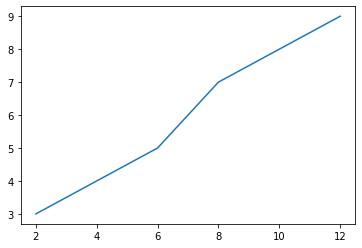

In [5]:
plt.plot(x1,y1)

In [6]:
a=[1,2,3,4,5]
b=[-1,-2,-3,-4,-5]

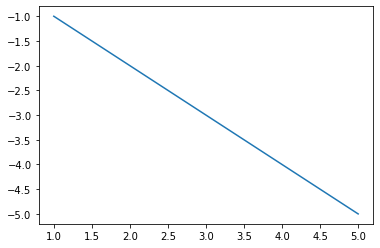

In [7]:
plt.plot(a,b)

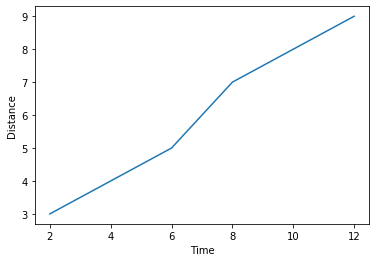

In [9]:
plt.xlabel("Time")
plt.ylabel("Distance")
plt.plot(x1,y1)

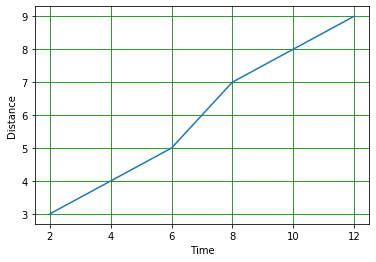

In [10]:
plt.xlabel("Time")   #x axis label
plt.ylabel("Distance") #y
plt.grid(c='green')  # to put graph lines
plt.plot(x1,y1)

In [11]:
x1=[2,6,8,12]
y1=[3,5,7,9]
x2=[12,16,18,2]
y2=[13,15,17,19]

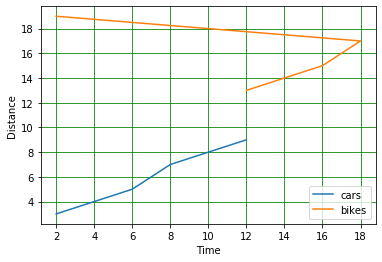

In [14]:
plt.xlabel("Time")   #x axis label
plt.ylabel("Distance") #y
plt.grid(c='green')  # to put graph lines
plt.plot(x1,y1,label="cars")
plt.plot(x2,y2,label="bikes")
plt.legend()    # to show the label of plot

# Bar plots

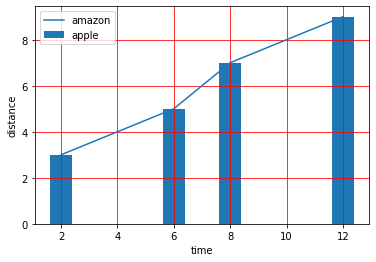

In [21]:
plt.xlabel('time')
plt.ylabel('distance')
plt.bar(x1,y1,label="apple")
plt.plot(x1,y1,label="amazon")
plt.grid(c='red')
plt.legend()

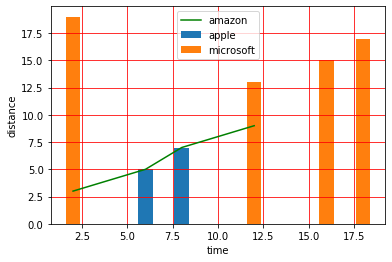

In [22]:
plt.xlabel('time')
plt.ylabel('distance')
plt.bar(x1,y1,label="apple")
plt.bar(x2,y2,label="microsoft")
plt.plot(x1,y1,label="amazon",c="green")
plt.grid(c='red')
plt.legend()

# Cricket Score

In [24]:
players=["virat","dhoni","sachin"]
runs=[234,342,987]

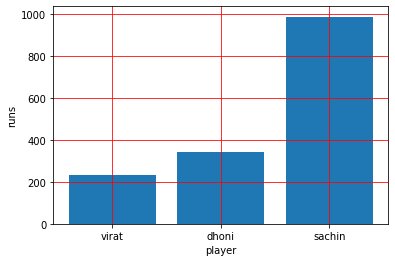

In [25]:
plt.bar(players,runs)
plt.xlabel("player")
plt.ylabel("runs")
plt.grid(c='r')

# Scatter / Dots plot

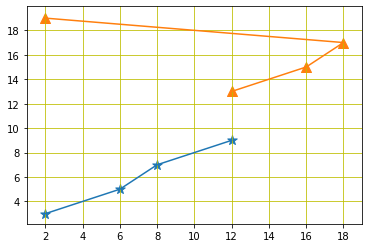

In [33]:
plt.scatter(x1,y1,marker='*',s=100)   # to change the marker ,   for size s=
plt.scatter(x2,y2,marker='^',s=100)
plt.plot(x1,y1)
plt.plot(x2,y2)   # to connect the marks with lines
plt.grid(c='y')

In [34]:
# using numpy 
import numpy as np

In [35]:
x=np.array([3,6,8,11,12,22,24])

In [36]:
x

array([ 3,  6,  8, 11, 12, 22, 24])

In [37]:
y=x**2

In [38]:
y

array([  9,  36,  64, 121, 144, 484, 576])

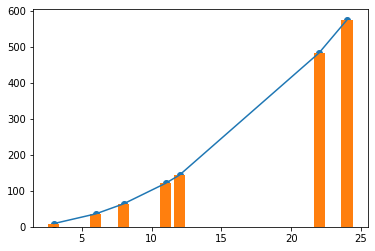

In [40]:
plt.scatter(x,y)
plt.bar(x,y)
plt.plot(x,y)

In [1]:
import  matplotlib.pyplot  as plt
from matplotlib import style
import matplotlib.animation  as animation 
import numpy as np
style.use('fivethirtyeight')

fig=plt.figure()
ax1=fig.add_subplot(1,1,1)

def animations(i):
    graph_data=open('hello.txt','r').read()
    lines=graph_data.split('\n')
    xs=[]
    ys=[]
    for  line in lines:
        if len(line) > 1:
            x,y=line.split(',')
            xs.append(x)
            ys.append(y)
    ax1.clear()
    ax1.plot(xs,ys)
    
ani=animation.FuncAnimation(fig,animations,interval=1000)
plt.show()


<Figure size 640x480 with 1 Axes>

In [5]:
import requests
response = requests.get("https://www.google.com/search?q=live+cricket+score&oq=live+cricket+score&aqs=chrome.0.69i59j69i60j69i61j0l3.4721j0j7&sourceid=chrome&ie=UTF-8")
print(response)

<Response [200]>


In [8]:
from pycricbuzz import Cricbuzz
from pprint import pprint
import json

c=Cricbuzz()

def match_id(desc):
	all_matches = c.matches()
	for match in all_matches:
		if match['mchdesc'].title() == desc:
			return match['id']
	else:
		return None


def all_matches():
	match_data = c.matches()
	matches = []
	for match in match_data:
		matches.append(match['mchdesc'])
	return matches


def live_score(desc):
	mid = match_id(desc)
	data = c.livescore(mid)
	score = {}
	score['matchinfo'] = "{}, {}".format(data['matchinfo']['mnum'],data['matchinfo']['mchdesc'])
	score['status'] = "{}, {}".format(data['matchinfo']['mchstate'].title(),data['matchinfo']['status'])
	score['bowling'] = data['bowling']
	score['batting'] = data['batting']

	text = ''
	text += score['matchinfo'] + '\n' + score['status'] + '\n\n'
	text += score['batting']['team'] + '\n'
	
	for scr in reversed(score['batting']['score']):
		text += "{} :- {}/{} in {} overs\n".format(scr['desc'],scr['runs'],scr['wickets'],scr['overs']) 
	for b in reversed(score['batting']['batsman']):
		text += "{} : {}({}) \n".format(b['name'].strip('*'),b['runs'],b['balls'])
	text += "\n" + score['bowling']['team'] + '\n'
	for scr in reversed(score['bowling']['score']):
		text += "{} :- {}/{} in {} overs\n".format(scr['desc'],scr['runs'],scr['wickets'],scr['overs']) 
	for b in reversed(score['bowling']['bowler']):
		text += "{} : {}/{} \n".format(b['name'].strip('*'),b['wickets'],b['runs'])
	
	return text


def commentary(desc):
	mid = match_id(desc)
	data = c.commentary(mid)
	comm ={}
	comm['matchinfo'] = "{}, {}".format(data['matchinfo']['mnum'],data['matchinfo']['mchdesc'])
	comm['status'] = "{}, {}".format(data['matchinfo']['mchstate'].title(),data['matchinfo']['status'])
	comm['commentary'] = data['commentary']
	text =''
	text += comm['matchinfo'] + '\n' + comm['status'] + '\n\n'
	for com in comm['commentary']:
		text += "{}\n\n".format(com)

	return text


def scorecard(desc):
	mid = match_id(desc)
	data = c.scorecard(mid)
	card = {}
	card['matchinfo'] = "{}, {}".format(data['matchinfo']['mnum'],data['matchinfo']['mchdesc'])
	card['status'] = "{}, {}".format(data['matchinfo']['mchstate'].title(),data['matchinfo']['status'])
	card['scorecard'] = data['scorecard']
	text = ''
	text += card['matchinfo'] + '\n' + card['status'] + '\n\n'
	text +='*'*35 +'\n\n'

    

ModuleNotFoundError: No module named 'pycricbuzz'